In [1]:
#Import necessary libraries

import pandas as pd
import pandas_datareader.data as web
import numpy as np
import datetime
%matplotlib inline

In [2]:
import datetime
import seaborn as sns
sns.set_style('whitegrid')

In [3]:
#Choose Start and End Date of Stock Data You Need

start = datetime.datetime(2006,1,1)
end = datetime.datetime(2019, 8, 17)

In [61]:
#Load In Stock Data Through DataReader

A = web.DataReader('A', 'yahoo', start, end)
AMZN = web.DataReader('AMZN', 'yahoo', start, end)
AAPL = web.DataReader('AAPL', 'yahoo', start, end)
MSFT = web.DataReader('MSFT', 'yahoo', start, end)
FB = web.DataReader('FB', 'yahoo', start, end)
DJI = web.DataReader('^DJI', 'yahoo', start, end)

In [50]:
#Create List Of Tickers

tickers = ['A','AMZN','AAPL','MSFT','DJI']

In [51]:
#Concatenate Pandas Dataframes Together

tech_stocks = pd.concat([A,AMZN,AAPL,MSFT,DJI],axis=1,keys=tickers)

In [52]:
tech_stocks.columns.names = ['Name','Stock Info']

In [53]:
#Check Out Dataframe

tech_stocks.head()

Name                A                                                         \
Stock Info       High        Low       Open      Close     Volume  Adj Close   
Date                                                                           
2006-01-03  24.020029  23.476395  23.891273  23.962805  5307000.0  20.976198   
2006-01-04  24.198856  23.869814  23.998569  24.027182  4195800.0  21.032551   
2006-01-05  24.656652  23.927038  23.927038  24.656652  4835400.0  21.583565   
2006-01-06  24.885551  24.384836  24.678112  24.785408  6146300.0  21.696278   
2006-01-09  24.892704  24.620888  24.785408  24.713877  4082800.0  21.633652   

Name             AMZN                                   ...       MSFT  \
Stock Info       High        Low       Open      Close  ...       Open   
Date                                                    ...              
2006-01-03  47.849998  46.250000  47.470001  47.580002  ...  26.250000   
2006-01-04  47.730000  46.689999  47.490002  47.250000  ...  26.770000   
2006-01-05  48.200001  47.110001  47.160000  47.650002  ...  26.959999   
2006-01-06  48.580002  47.320000  47.970001  47.869999  ...  26.889999   
2006-01-09  47.099998  46.400002  46.549999  47.080002  ...  26.930000   

Name                                                    DJI                \
Stock Info      Close       Volume  Adj Close          High           Low   
Date                                                                        
2006-01-03  26.840000   79973000.0  19.777893  10862.780273  10684.450195   
2006-01-04  26.969999   57975600.0  19.873684  10892.639648  10833.900391   
2006-01-05  26.990000   48245500.0  19.888428  10908.250000  10843.650391   
2006-01-06  26.910000  100963000.0  19.829477  10968.839844  10875.450195   
2006-01-09  26.860001   55625000.0  19.792625  11020.150391  10944.429688   

Name                                                             
Stock Info          Open         Close     Volume     Adj Close  
Date                                                             
2006-01-03  10718.299805  10847.410156  302950000  10847.410156  
2006-01-04  10843.969727  10880.150391  271490000  10880.150391  
2006-01-05  10880.389648  10882.150391  250910000  10882.150391  
2006-01-06  10875.450195  10959.309570  291740000  10959.309570  
2006-01-09  10959.469727  11011.900391  248240000  11011.900391  

[5 rows x 30 columns]

In [67]:
#Max Close Price For Each Company

tech_stocks.xs(key='Close',level='Stock Info',axis=1).max()

Name
A          82.000000
AMZN     2039.510010
AAPL      232.070007
MSFT      141.339996
DJI     27359.160156
dtype: float64

In [84]:
#Create Returns Df

returns = pd.DataFrame()

In [85]:
for tick in tickers:
    returns[tick+' Return']= tech_stocks[tick]['Adj Close'].pct_change()

In [86]:
returns.head()

,A Return,AMZN Return,AAPL Return,MSFT Return,DJI Return
Date,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN
2006-01-04,0.002687,-0.006936,0.002944,0.004843,0.003018
2006-01-05,0.026198,0.008466,-0.007870,0.000742,0.000184
2006-01-06,0.005222,0.004617,0.025814,-0.002964,0.007090
2006-01-09,-0.002886,-0.016503,-0.003277,-0.001858,0.004799


In [58]:
#Dates Of Min Returns (Notice Most Occured During Recession)
#https://www.cnbc.com/2018/11/20/apple-is-having-its-worst-month-since-the-financial-crisis.html

returns.idxmin()

A Return      2011-08-08
AMZN Return   2006-07-26
AAPL Return   2008-09-29
MSFT Return   2009-01-22
DJI Return    2008-10-15
dtype: datetime64[ns]

In [59]:
#Dates of Max Returns (Greatest Spikes Also Occured During Recession)

returns.idxmax()

A Return      2008-10-13
AMZN Return   2007-04-25
AAPL Return   2008-10-13
MSFT Return   2008-10-13
DJI Return    2008-10-13
dtype: datetime64[ns]

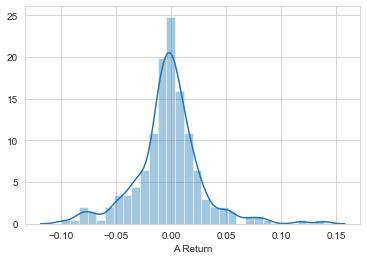

In [108]:
# Checking Out Distribution Of Google Stock Returns In 2008 Using Seaborn

sns.distplot(returns.loc['2008-01-01':'2008-12-31']['A Return'],bins=30)

Text(0.5, 1.0, 'Google Adj Close vs. 365 Day Moving Average')

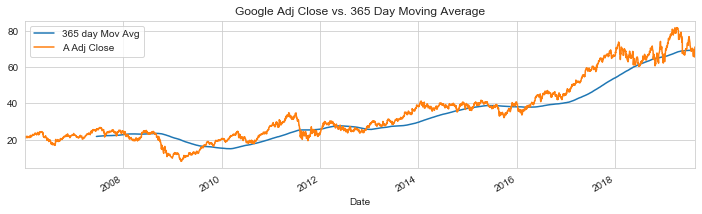

In [109]:
#Plotting Google Adjusted Close Price With 365 Day Moving Average

import matplotlib.pyplot as plt
plt.figure(figsize=(12,3))
A['Adj Close'].loc['2006-01-01':'2019-8-17'].rolling(window=365).mean().plot(label='365 day Mov Avg')
A['Adj Close'].loc['2006-01-01':'2019-8-17'].plot(label='A Adj Close')
plt.legend()
plt.title('Google Adj Close vs. 365 Day Moving Average')

Text(0.5, 1.0, 'Google Stock During Recession')

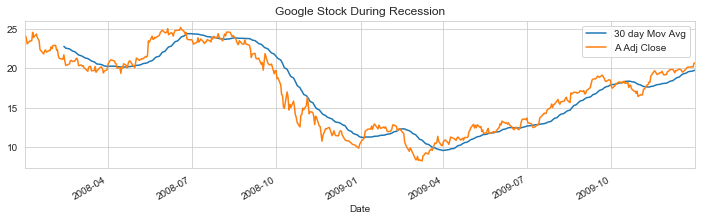

In [110]:
#Zooming in Google Stock Price Dip During Recession

plt.figure(figsize=(12,3))
A['Adj Close'].loc['2008-01-01':'2010-01-01'].rolling(window=30).mean().plot(label='30 day Mov Avg')
A['Adj Close'].loc['2008-01-01':'2010-01-01'].plot(label='A Adj Close')
plt.legend()
plt.title('Google Stock During Recession')

In [105]:
#Import Plotly/Cufflinks Libraries

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True) 
cf.go_offline()

In [106]:
#Candle Plot using Plotly

tech_stocks['A'].loc['2008-01-01':'2010-01-01'].iplot(kind='candle')

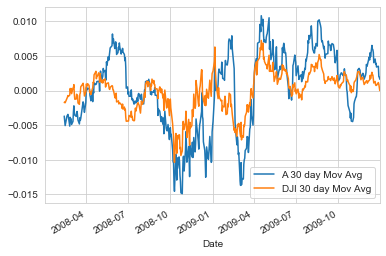

In [93]:
# Stock Returns Tend To Follow Dow Jones Index

returns['A Return'].loc['2008-01-01':'2010-01-01'].rolling(window=30).mean().plot(label='A 30 day Mov Avg')
returns['DJI Return'].loc['2008-01-01':'2010-01-01'].rolling(window=30).mean().plot(label='DJI 30 day Mov Avg')
plt.legend()


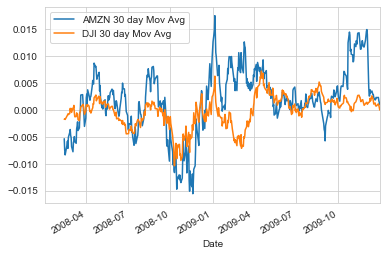

In [96]:
returns['AMZN Return'].loc['2008-01-01':'2010-01-01'].rolling(window=30).mean().plot(label='AMZN 30 day Mov Avg')
returns['DJI Return'].loc['2008-01-01':'2010-01-01'].rolling(window=30).mean().plot(label='DJI 30 day Mov Avg')
plt.legend()

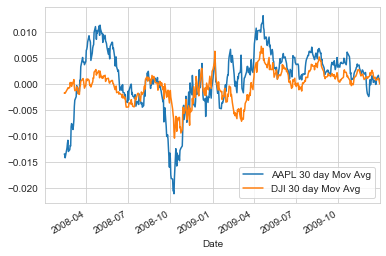

In [97]:
returns['AAPL Return'].loc['2008-01-01':'2010-01-01'].rolling(window=30).mean().plot(label='AAPL 30 day Mov Avg')
returns['DJI Return'].loc['2008-01-01':'2010-01-01'].rolling(window=30).mean().plot(label='DJI 30 day Mov Avg')
plt.legend()

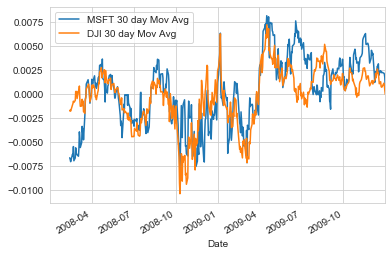

In [98]:
returns['MSFT Return'].loc['2008-01-01':'2010-01-01'].rolling(window=30).mean().plot(label='MSFT 30 day Mov Avg')
returns['DJI Return'].loc['2008-01-01':'2010-01-01'].rolling(window=30).mean().plot(label='DJI 30 day Mov Avg')
plt.legend()

In [114]:
#Examine Correlation Between Different Stocks
#Google Most Correlated With Dow Jones

tech_stocks.xs(key='Close',level='Stock Info',axis=1).corr()

Name,A,AMZN,AAPL,MSFT,DJI
Name,,,,,
A,1.000000,0.936715,0.934433,0.940229,0.979377
AMZN,0.936715,1.000000,0.922923,0.982655,0.934777
AAPL,0.934433,0.922923,1.000000,0.906148,0.946911
MSFT,0.940229,0.982655,0.906148,1.000000,0.945219
DJI,0.979377,0.934777,0.946911,0.945219,1.000000
